# Initialise
---

In [9]:
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload 
%autoreload 2
import os
import sys
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import pdist


# Fix della root del progetto --------------------------------------------------
print("\nFixing project root")
print(f'default sys.path: {sys.path}')
PROJ_ROOT = os.path.abspath(os.path.join(os.pardir, '..')) # cheat fix
sys.path.append(PROJ_ROOT)
print(f'Project root: {PROJ_ROOT}')

# Importazione del modulo compass
QUESTIONS = ['globalisationinevitable', 'countryrightorwrong', 'proudofcountry', 'racequalities', 'enemyenemyfriend', 'militaryactionlaw', 'fusioninfotainment', 'classthannationality', 'inflationoverunemployment', 'corporationstrust', 'fromeachability', 'freermarketfreerpeople', 'bottledwater', 'landcommodity', 'manipulatemoney', 'protectionismnecessary', 'companyshareholders', 'richtaxed', 'paymedical', 'penalisemislead', 'freepredatormulinational', 'abortionillegal', 'questionauthority', 'eyeforeye', 'taxtotheatres', 'schoolscompulsory', 'ownkind', 'spankchildren', 'naturalsecrets', 'marijuanalegal', 'schooljobs', 'inheritablereproduce', 'childrendiscipline', 'savagecivilised', 'abletowork', 'represstroubles', 'immigrantsintegrated', 'goodforcorporations', 'broadcastingfunding', 'libertyterrorism', 'onepartystate', 'serveillancewrongdoers', 'deathpenalty', 'societyheirarchy', 'abstractart', 'punishmentrehabilitation', 'wastecriminals', 'businessart', 'mothershomemakers', 'plantresources', 'peacewithestablishment', 'astrology', 'moralreligious', 'charitysocialsecurity', 'naturallyunlucky', 'schoolreligious', 'sexoutsidemarriage', 'homosexualadoption', 'pornography', 'consentingprivate', 'naturallyhomosexual', 'opennessaboutsex']
# Fix della root del progetto --------------------------------------------------



# Importazione dei moduli per LLMs --------------------------------------------
print("\nImporting LLMs modules")
from huggingface_hub import login
os.environ["HUGGINGFACE_TOKEN"] = ""
login(token=os.environ["HUGGINGFACE_TOKEN"])

import torch
# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using CUDA")
# If not, check if MPS is available
elif torch.backends.mps.is_available():
    device = torch.device("mps")
    print("Using MPS")
# If neither CUDA nor MPS is available, use CPU
else:
    device = torch.device("cpu")
    print("Using CPU")

# Test the device
x = torch.ones(1, device=device)
print(x)
# Importazione dei moduli per LLMs --------------------------------------------

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Fixing project root
default sys.path: ['/Users/uqpberna/miniconda3/envs/personas/lib/python312.zip', '/Users/uqpberna/miniconda3/envs/personas/lib/python3.12', '/Users/uqpberna/miniconda3/envs/personas/lib/python3.12/lib-dynload', '', '/Users/uqpberna/miniconda3/envs/personas/lib/python3.12/site-packages', '/Users/uqpberna/miniconda3/envs/personas/lib/python3.12/site-packages/setuptools/_vendor', '/Users/uqpberna/Documents', '/Users/uqpberna/Documents']
Project root: /Users/uqpberna/Documents

Importing LLMs modules
Using MPS
tensor([1.], device='mps:0')


# Load dataframes
---

In [3]:
models = ['Mistral-7B-Instruct-v0.3', 'Llama-3.1-8B-Instruct', 'Qwen2.5-7B-Instruct', 'zephyr-7b-beta']

In [6]:
# Initialize a dictionary to store results
avg_distances = {}

# Iterate through each model, compute the centroid and average distance, then free memory
for model in models:
    # Load the dataset
    file_path = f'./data/processed/{model}/right_authoritarian_personas/persona_compass.pqt'
    df = pd.read_parquet(file_path)
    
    # Extract and preprocess compass positions
    df['compass_position'] = df['compass_position'].apply(lambda x: (x[0], x[1]))
    unique_positions = df[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)
    
    # Calculate the centroid
    compass_positions = np.array([np.array(x) for x in unique_positions['compass_position']])
    centroid = np.mean(compass_positions, axis=0)
    
    # Calculate the average distance from the centroid
    distances = np.linalg.norm(compass_positions - centroid, axis=1)
    avg_distances[model] = np.mean(distances)
    
    # Print the result for the current model
    print(f"Model: {model}, Average Distance: {avg_distances[model]}")
    
    # Free memory
    del df, unique_positions, compass_positions, distances

# Optionally, print all results at the end
print("Final Results:", avg_distances)


Model: Mistral-7B-Instruct-v0.3, Average Distance: 1.7663316785158476
Model: Llama-3.1-8B-Instruct, Average Distance: 1.8013014237717195
Model: Qwen2.5-7B-Instruct, Average Distance: 1.3478195815740115
Model: zephyr-7b-beta, Average Distance: 1.1751956766299407
Final Results: {'Mistral-7B-Instruct-v0.3': 1.7663316785158476, 'Llama-3.1-8B-Instruct': 1.8013014237717195, 'Qwen2.5-7B-Instruct': 1.3478195815740115, 'zephyr-7b-beta': 1.1751956766299407}


In [7]:
# Initialize a dictionary to store results
avg_distances = {}

# Iterate through each model, compute the centroid and average distance, then free memory
for model in models:
    # Load the dataset
    file_path = f'./data/processed/{model}/left_libertarian_personas/persona_compass.pqt'
    df = pd.read_parquet(file_path)
    
    # Extract and preprocess compass positions
    df['compass_position'] = df['compass_position'].apply(lambda x: (x[0], x[1]))
    unique_positions = df[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)
    
    # Calculate the centroid
    compass_positions = np.array([np.array(x) for x in unique_positions['compass_position']])
    centroid = np.mean(compass_positions, axis=0)
    
    # Calculate the average distance from the centroid
    distances = np.linalg.norm(compass_positions - centroid, axis=1)
    avg_distances[model] = np.mean(distances)
    
    # Print the result for the current model
    print(f"Model: {model}, Average Distance: {avg_distances[model]}")
    
    # Free memory
    del df, unique_positions, compass_positions, distances

# Optionally, print all results at the end
print("Final Results:", avg_distances)

Model: Mistral-7B-Instruct-v0.3, Average Distance: 0.9495252746186302
Model: Llama-3.1-8B-Instruct, Average Distance: 1.6058115159289466
Model: Qwen2.5-7B-Instruct, Average Distance: 0.8330667729874689
Model: zephyr-7b-beta, Average Distance: 1.1632754487812709
Final Results: {'Mistral-7B-Instruct-v0.3': 0.9495252746186302, 'Llama-3.1-8B-Instruct': 1.6058115159289466, 'Qwen2.5-7B-Instruct': 0.8330667729874689, 'zephyr-7b-beta': 1.1632754487812709}


In [11]:
dfs_base = {}

for model in models:
    df = pd.read_parquet(f'./data/processed/{model}/base/persona_compass.pqt')
    df['compass_position'] = df['compass_position'].apply(lambda x: (x[0], x[1]))
    dfs_base[model] = df[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

# For each of the models, calculate the centroid of the compass positions
centroids = {}
for model in models:
    centroids[model] = np.mean(np.array([np.array(x) for x in dfs_base[model]['compass_position']]), axis=0)

In [12]:
print(centroids)

{'Mistral-7B-Instruct-v0.3': array([-1.6014893 , -4.48315665]), 'Llama-3.1-8B-Instruct': array([-1.75823155, -3.99911955]), 'Qwen2.5-7B-Instruct': array([-2.5915478, -4.5179767]), 'zephyr-7b-beta': array([-0.8332137, -3.1384339])}


In [13]:
# For each model measure the average distance from the centroid
avg_distances = {}

for model in models:
    distances = np.array([np.linalg.norm(np.array(x) - centroids[model]) for x in dfs_base[model]['compass_position']])
    avg_distances[model] = np.mean(distances)

print(avg_distances)

{'Mistral-7B-Instruct-v0.3': 1.518060223594652, 'Llama-3.1-8B-Instruct': 1.757505765153881, 'Qwen2.5-7B-Instruct': 1.559813073737651, 'zephyr-7b-beta': 1.163570484690706}


#### Authoritarian right personas
---

In [14]:
dfs_a = {}

for model in models:
    df = pd.read_parquet(f'./data/processed/{model}/right_authoritarian_personas/persona_compass.pqt')
    df['compass_position'] = df['compass_position'].apply(lambda x: (x[0], x[1]))
    dfs_a[model] = df[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

#### Libertarian left personas
---

In [15]:
dfs_l = {}

for model in models:
    df = pd.read_parquet(f'./data/processed/{model}/left_libertarian_personas/persona_compass.pqt')
    df['compass_position'] = df['compass_position'].apply(lambda x: (x[0], x[1]))
    dfs_l[model] = df[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

# Plot distributions with marginals
---

In [16]:
def plot_compass_density(df, bins=None, gridsize=30, label_gap=1.5, label_margin=0.15, 
                      marginal_ratio=12, tick_interval=2, scientific_notation=True,
                      label_size=10, tick_size=8, colorbar_size=8, marginal_alpha=0.5,
                      origin_lines_alpha=0.8, np_dot=None, triangle=False):
                      
    """
    Plot the compass density with controllable label spacing, marginal size, and formatting options.
    """
    # Extract x and y coordinates from the compass_position tuples
    x_coords = [pos[0] for pos in df['compass_position']]
    y_coords = [pos[1] for pos in df['compass_position']]
    
    # Create the joint plot with adjusted heights
    g = sns.JointGrid(x=x_coords, y=y_coords, 
                      height=8,
                      ratio=marginal_ratio,
                      marginal_ticks=True,
                      space=label_margin)
    
    # Add the scatter plot with hexbin
    hexbin = g.ax_joint.hexbin(
        x_coords, 
        y_coords,
        gridsize=gridsize,
        cmap='YlOrRd',
        mincnt=1,
        bins=bins,
        extent=(-10, 10, -10, 10)
    )
    
    # Add the marginal distributions with the specified alpha
    g.plot_marginals(sns.histplot, bins=gridsize, color='#FF6B6B', alpha=marginal_alpha)
    
    # Set figure size
    g.figure.set_size_inches(10, 10)
    
    # Set the axis limits and ticks for the main plot
    g.ax_joint.set_xlim(-10, 10)
    g.ax_joint.set_ylim(-10, 10)
    
    # Set tick intervals
    ticks = np.arange(-10, 11, tick_interval)
    g.ax_joint.set_xticks(ticks)
    g.ax_joint.set_yticks(ticks)

    # Set minor grid lines
    grid_lines = np.arange(-10, 11, 1)
    g.ax_joint.set_xticks(grid_lines, minor=True)
    g.ax_joint.set_yticks(grid_lines, minor=True)

    # Show all spines (borders)
    for spine in ['top', 'right', 'left', 'bottom']:
        g.ax_joint.spines[spine].set_visible(True)
        g.ax_joint.spines[spine].set_color('black')
        g.ax_joint.spines[spine].set_linewidth(1.2)

    # Also show spines for marginal plots
    # for spine in ['top', 'right', 'left', 'bottom']:
    #     g.ax_marg_x.spines[spine].set_visible(True)
    #     g.ax_marg_x.spines[spine].set_color('black')
    #     g.ax_marg_x.spines[spine].set_linewidth(1.2)
    #     g.ax_marg_y.spines[spine].set_visible(True)
    #     g.ax_marg_y.spines[spine].set_color('black')
    #     g.ax_marg_y.spines[spine].set_linewidth(1.2)

    # Custom formatter function for axis ticks
    def custom_formatter(x, p):
        if x == -10:
            return ''  # Remove -10 from both axes
        if abs(x) >= 1000:
            return f'{int(x/1000)}k'
        return str(int(x))
    
    # Apply custom formatter to main plot
    g.ax_joint.xaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
    g.ax_joint.yaxis.set_major_formatter(plt.FuncFormatter(custom_formatter))
    
    # Custom formatter for marginal plots
    def format_thousand_ticks(x, p):
        if abs(x) >= 1000:
            return f'{int(x/1000)}k'
        return str(int(x))
    
    # Apply custom formatter to marginal plots
    g.ax_marg_x.yaxis.set_major_formatter(plt.FuncFormatter(format_thousand_ticks))
    g.ax_marg_y.xaxis.set_major_formatter(plt.FuncFormatter(format_thousand_ticks))
    
    # Set tick label size
    g.ax_joint.tick_params(axis='both', labelsize=tick_size)
    g.ax_marg_x.tick_params(axis='both', labelsize=tick_size)
    g.ax_marg_y.tick_params(axis='both', labelsize=tick_size)
    
    # Remove default axis labels
    g.ax_joint.set_xlabel('')
    g.ax_joint.set_ylabel('')
    
    # Adjust margins based on label_gap
    margin_size = label_gap / 20
    plt.subplots_adjust(left=0.15 + margin_size, bottom=0.15 + margin_size)
    
    # Calculate label positions based on gap
    label_pos = 10 + label_gap
    
    # Add labels with transforms to ensure they're outside the plot
    # For X-axis
    g.ax_joint.text(-10, -label_pos, '← Left', ha='left', va='top', 
                    transform=g.ax_joint.transData, fontsize=label_size)
    g.ax_joint.text(10, -label_pos, 'Right →', ha='right', va='top', 
                    transform=g.ax_joint.transData, fontsize=label_size)
    
    # For Y-axis
    g.ax_joint.text(-label_pos, 10, 'Authorit. →', ha='right', va='top', 
                    rotation=90, transform=g.ax_joint.transData, fontsize=label_size)
    g.ax_joint.text(-label_pos, -10, '← Libert.', ha='right', va='bottom', 
                    rotation=90, transform=g.ax_joint.transData, fontsize=label_size)
    
    # Add the -10 label in the bottom left corner
    g.ax_joint.text(-10.3, -10.3, '-10', ha='right', va='top', 
                    transform=g.ax_joint.transData, fontsize=tick_size)
    
    # Add colorbar
    joint_pos = g.ax_joint.get_position()
    cbar_width = 0.03

    # Get the position of the right marginal plot
    marg_right_pos = g.ax_marg_y.get_position()

    # Position colorbar
    cax = g.figure.add_axes([
        marg_right_pos.x1 + 0.04,
        joint_pos.y0,
        cbar_width,
        joint_pos.height
    ])

    # Add colorbar with appropriate number format
    cbar = g.figure.colorbar(hexbin, cax=cax, label='')
    if not scientific_notation:
        cbar.formatter.set_powerlimits((0, 0))  # Force regular notation
    cbar.ax.tick_params(labelsize=colorbar_size)
    cbar.update_ticks()
    
    # Add grid lines
    g.ax_joint.grid(True, which='major', linestyle='-', alpha=0.7)  # Major grid lines
    g.ax_joint.grid(True, which='minor', linestyle='--', alpha=0.7)
    
    # Add center lines with configurable opacity
    g.ax_joint.axhline(y=0, color='k', linestyle='-', alpha=origin_lines_alpha, linewidth=1.5)
    g.ax_joint.axvline(x=0, color='k', linestyle='-', alpha=origin_lines_alpha, linewidth=1.5)

    if np_dot is not None:
        if triangle==True:
            # Add white border effect by plotting a larger white triangle behind
            g.ax_joint.scatter(np_dot[0], np_dot[1], marker='^', color='black', s=190, zorder=4)  # Larger white triangle
            g.ax_joint.scatter(np_dot[0], np_dot[1], marker='^', color='white', s=100, zorder=5)  # Smaller black triangle on top
        # Add white border effect by plotting a larger white point behind
        else:
            g.ax_joint.scatter(np_dot[0], np_dot[1], color='black', s=150, zorder=4)  # Larger white point
            g.ax_joint.scatter(np_dot[0], np_dot[1], color='white', s=100, zorder=5)  # Smaller black point on top    
    return g

#### Base

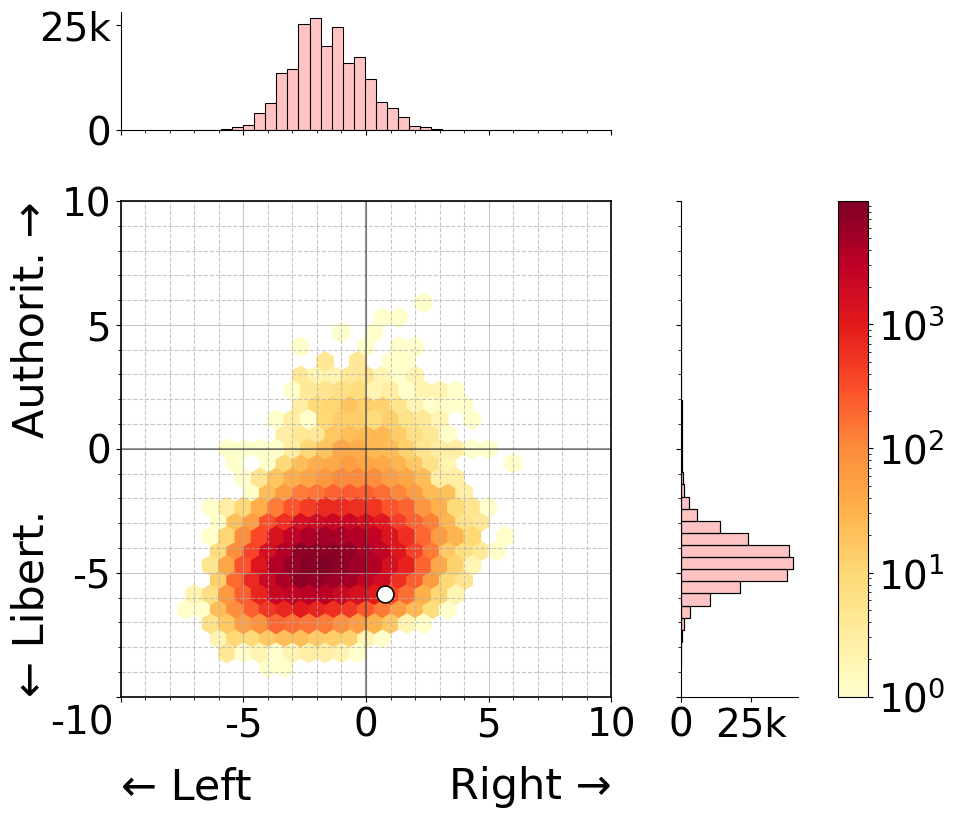

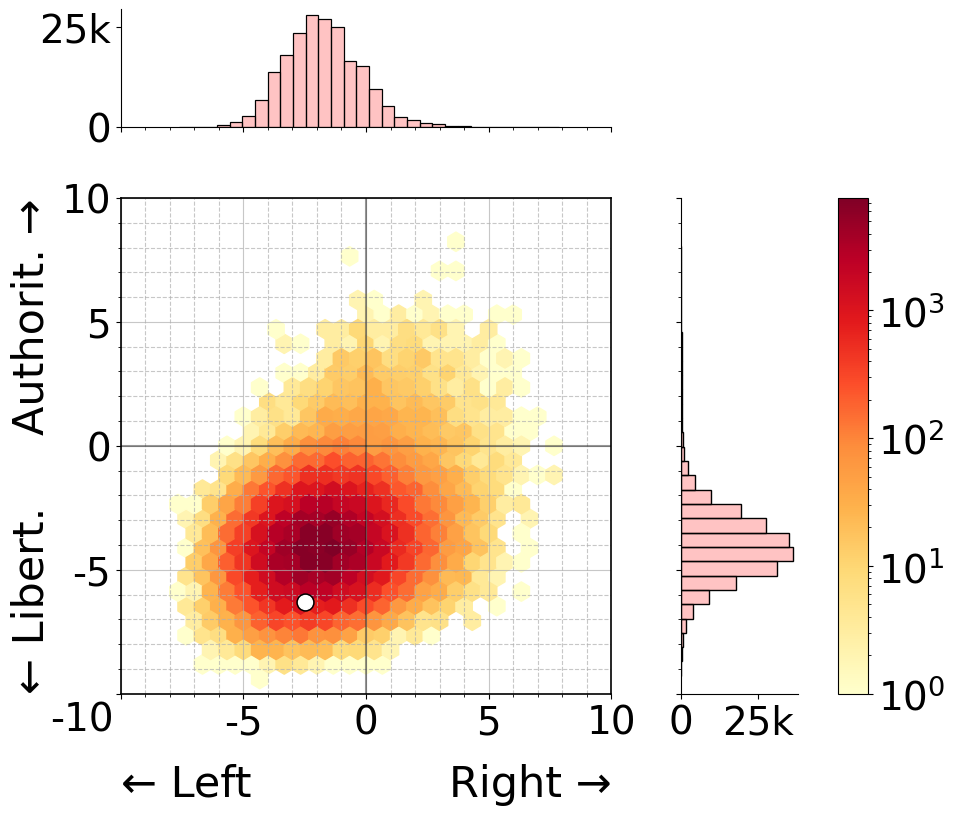

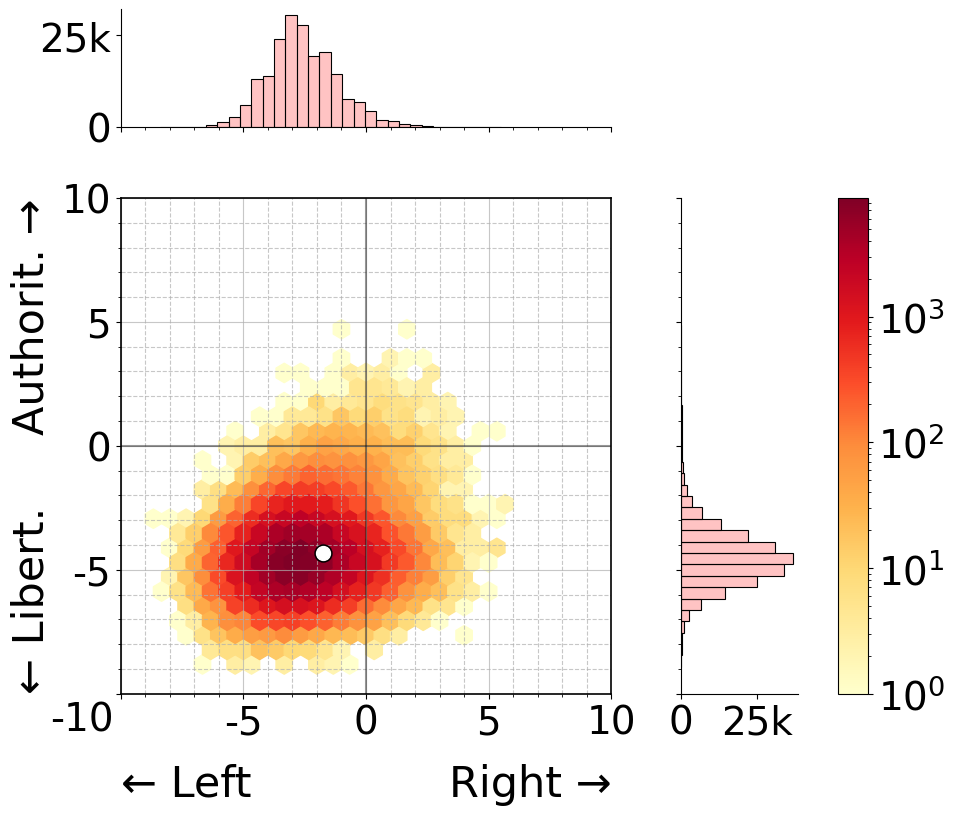

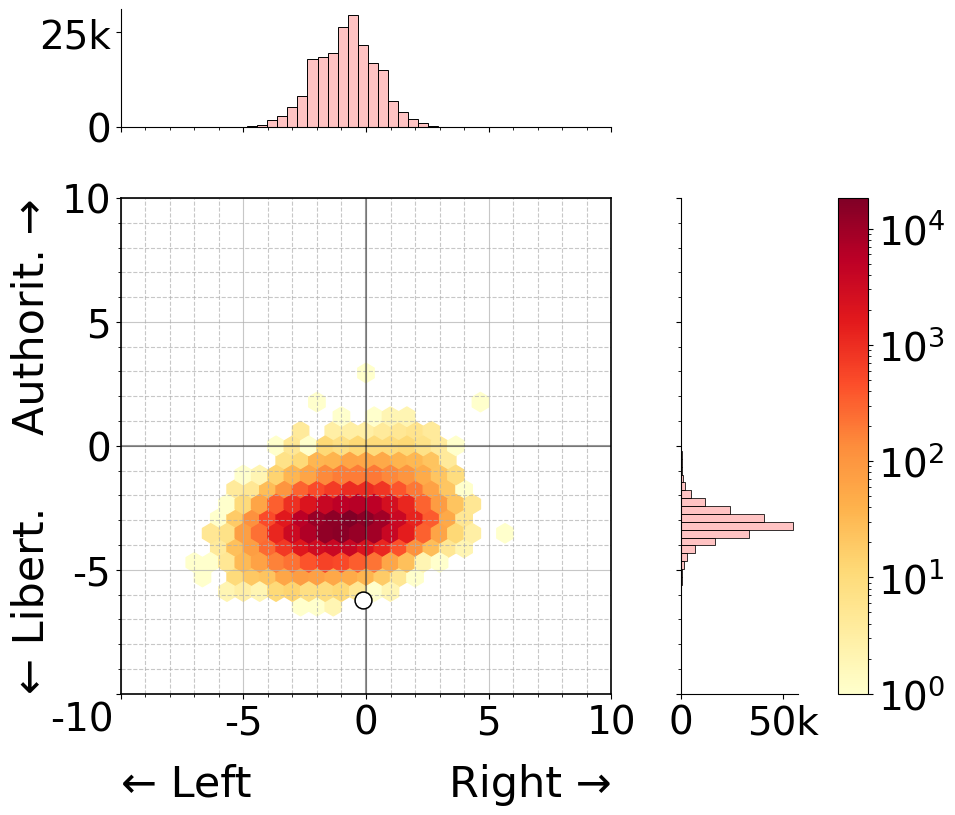

In [17]:
no_p_dot = [(0.76,-5.85), (-2.49, -6.31), (-1.74,-4.31), (-0.12,-6.21)] # mistral - llama - qwen - zephyr base position

for model, coord in zip(models, no_p_dot):
    l = plot_compass_density(dfs_base[model], bins='log', gridsize=30, label_gap=2.8, 
                           label_margin=0.6, marginal_ratio=3, tick_interval=5, 
                           label_size=31, tick_size=28, colorbar_size=28, 
                           marginal_alpha=0.4, origin_lines_alpha=0.4, np_dot=coord)
    l.savefig(f'/Users/uqpberna/Documents/Code/ASPD_Generator/images/{model}/base/compass_density_log_{model}.png')
    plt.show()

#### Authoritarian right personas
---

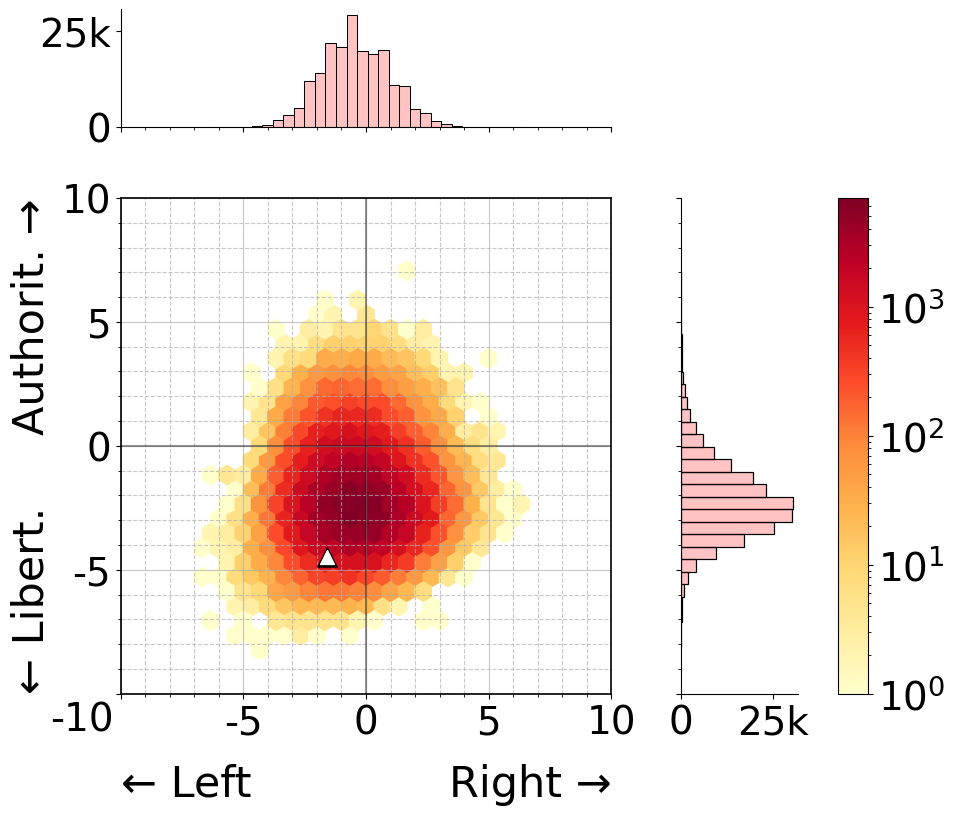

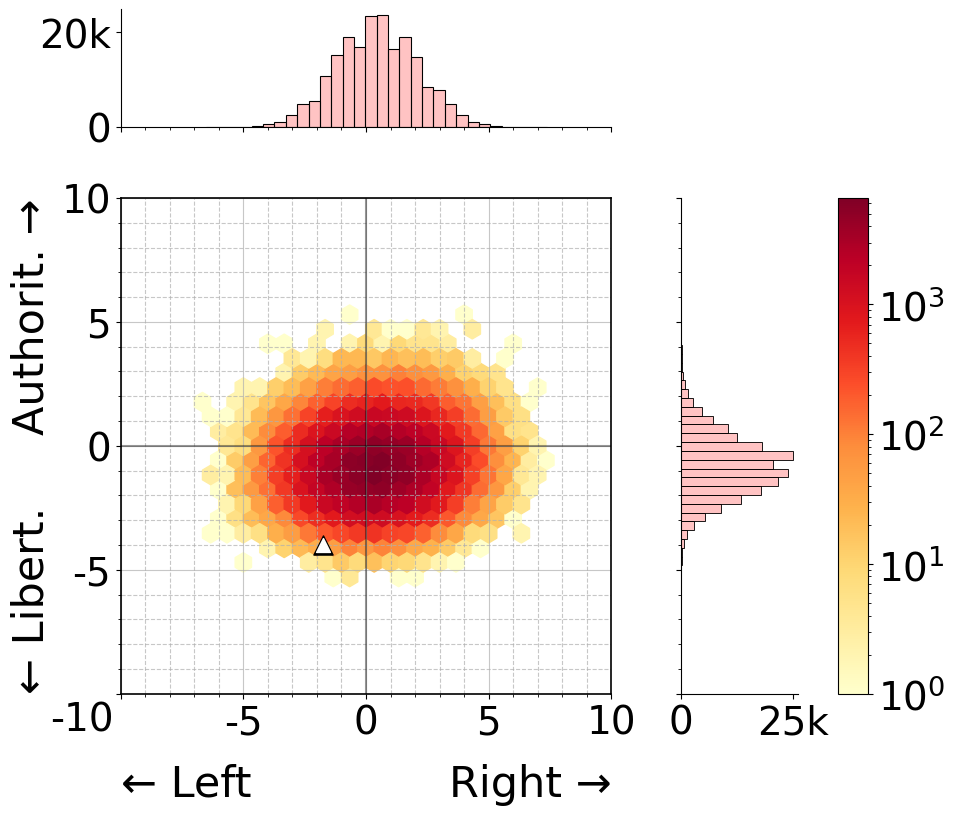

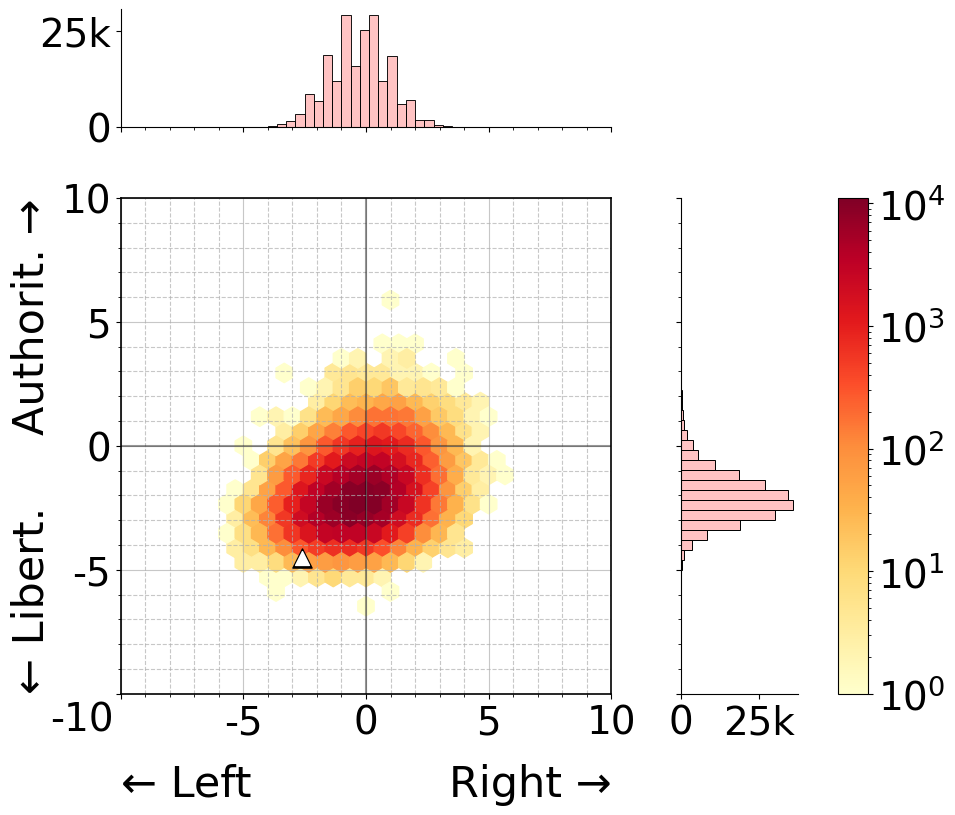

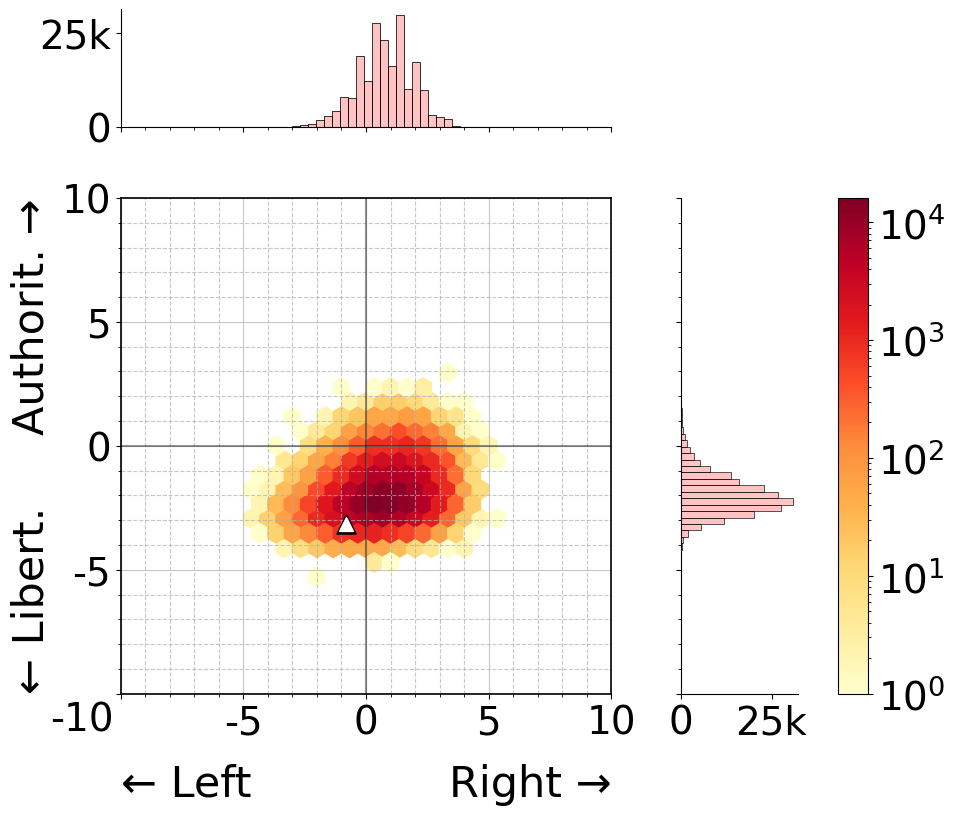

In [13]:
centroid_personas = [(-1.6014893 , -4.48315665), (-1.75823155, -3.99911955), (-2.5915478, -4.5179767), (-0.8332137, -3.1384339)] # mistral - llama - qwen - zephyr

for model, coord in zip(models, centroid_personas):
    l = plot_compass_density(dfs_a[model], bins='log', gridsize=30, label_gap=2.8, 
                             label_margin=0.6, marginal_ratio=3, tick_interval=5, 
                             label_size=31, tick_size=28, colorbar_size=28, marginal_alpha=0.4, origin_lines_alpha=0.4, np_dot=coord, triangle=True)
    l.savefig(f'/Users/uqpberna/Documents/Code/ASPD_Generator/images/{model}/right_authoritarian_personas/compass_density_log_{model}_righta.png')
    plt.show()

#### Libertarian left personas
---

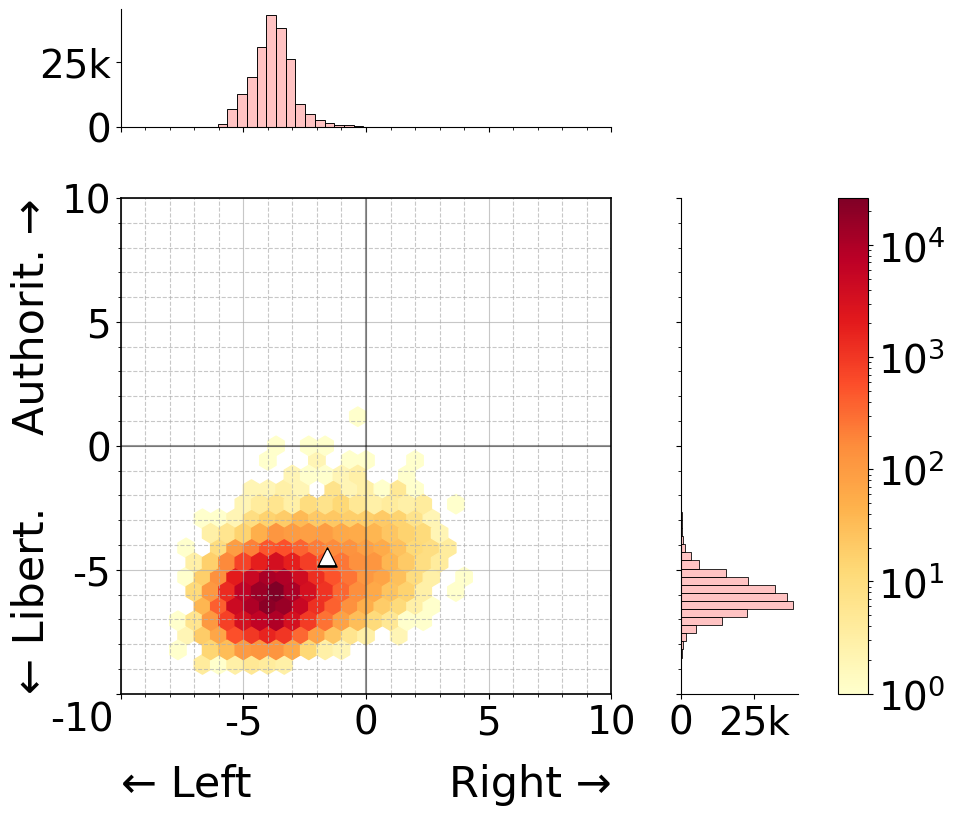

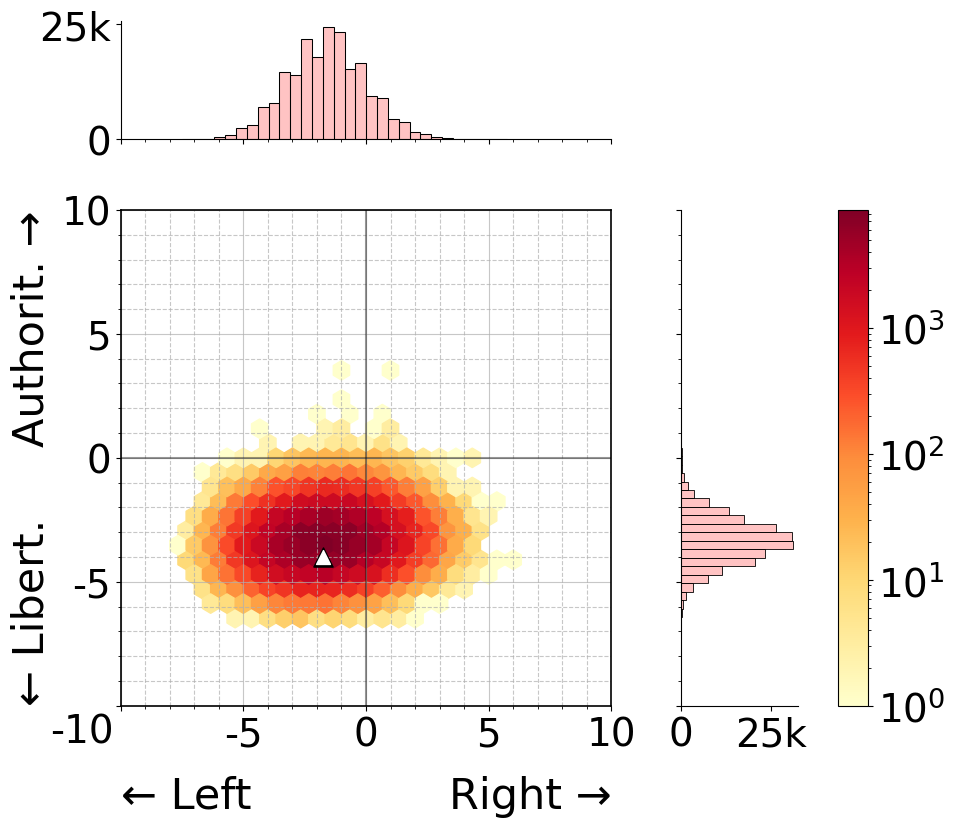

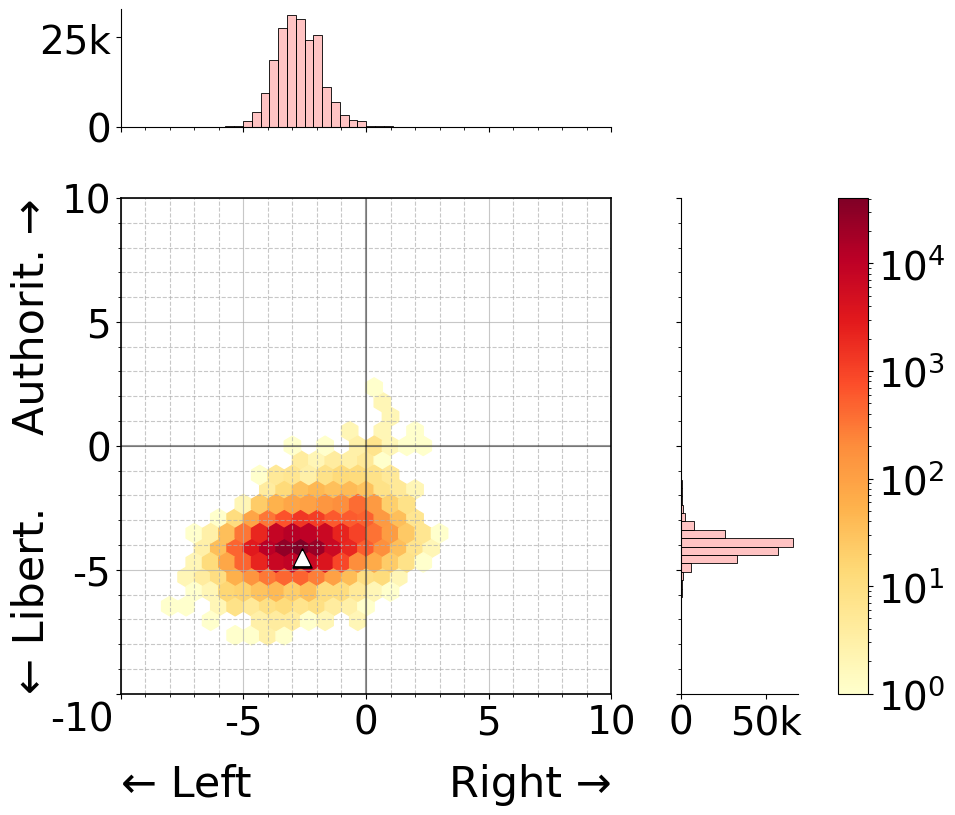

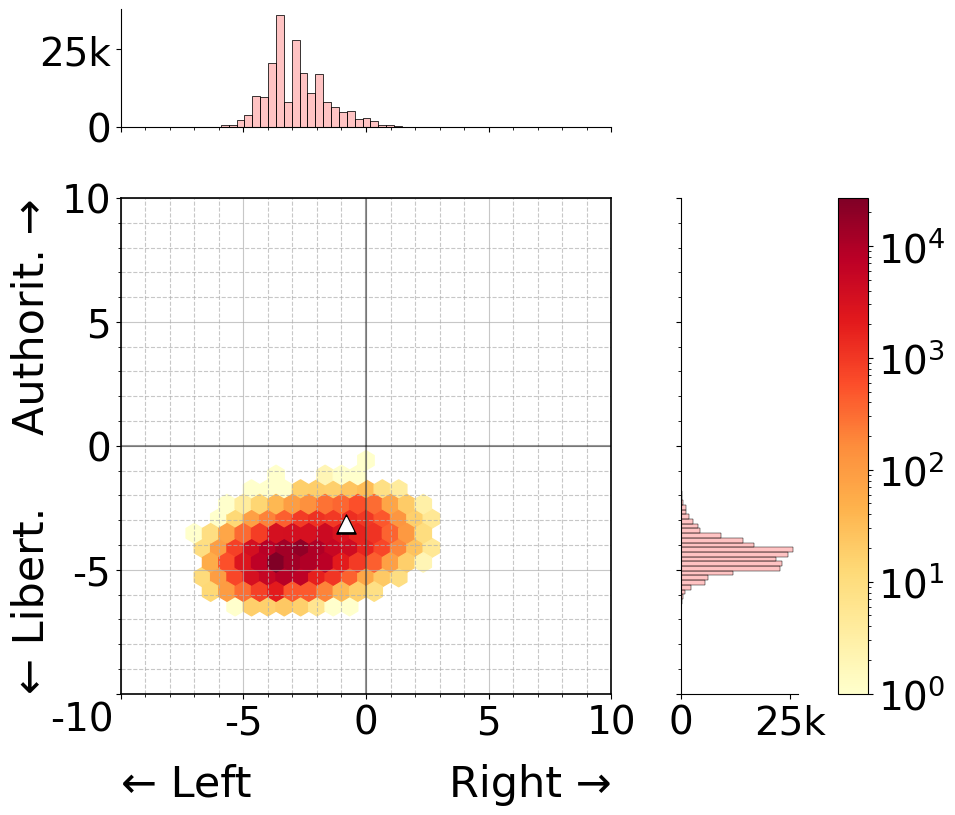

In [17]:
centroid_personas = [(-1.6014893 , -4.48315665), (-1.75823155, -3.99911955), (-2.5915478, -4.5179767), (-0.8332137, -3.1384339)] # mistral - llama - qwen - zephyr

for model, coord in zip(models, centroid_personas):
    l = plot_compass_density(dfs_l[model], bins='log', gridsize=30, label_gap=2.8, 
                             label_margin=0.6, marginal_ratio=3, tick_interval=5, 
                             label_size=31, tick_size=28, colorbar_size=28, marginal_alpha=0.4, origin_lines_alpha=0.4, np_dot=coord, triangle=True)
    l.savefig(f'/Users/uqpberna/Documents/Code/ASPD_Generator/images/{model}/left_libertarian_personas/compass_density_log_{model}_leftlibc.png')
    plt.show()

In [13]:
df_lib = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[0]}/df_b1_p10000_liber.pqt')
df_lib['compass_position'] = df_lib['compass_position'].apply(lambda x: (x[0], x[1]))
df_lib = df_lib[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

df_l = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[0]}/df_b1_p10000_left.pqt')
df_l['compass_position'] = df_l['compass_position'].apply(lambda x: (x[0], x[1]))
df_l = df_l[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

df_r = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[0]}/df_b1_p10000_right.pqt')
df_r['compass_position'] = df_r['compass_position'].apply(lambda x: (x[0], x[1]))
df_r = df_r[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

df_aut = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[0]}/df_b1_p10000_autor.pqt')
df_aut['compass_position'] = df_aut['compass_position'].apply(lambda x: (x[0], x[1]))
df_aut = df_aut[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

df_base = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[0]}/base/persona_compass.pqt')

In [14]:
print(df_base.iloc[0]['prompt'])
df_base = df_base[620000:1240000]

Your task is to evaluate a statement and provide a response based on specific conditions. 
Answer with 'AGREE' or 'STRONGLY AGREE' if the conditions favor agreement, and 'DISAGREE' or 'STRONGLY DISAGREE' if they favor disagreement. 
Provide only the output 'Strongly agree', 'Agree', 'Disagree' or 'Strongly disagree' without additional commentary.
Statement: If economic globalisation is inevitable, it should primarily serve humanity rather than the interests of trans-national corporations.
Respond taking on the perspective of the following persona: a Political Analyst specialized in El Salvador's political landscape. 
Output: 


In [16]:
print(df_base.tail())

         statement_id                                          statement  \
1239995            57  A same sex couple in a stable, loving relation...   
1239996            58  Pornography, depicting consenting adults, shou...   
1239997            59  What goes on in a private bedroom between cons...   
1239998            60              No one can feel naturally homosexual.   
1239999            61    These days openness about sex has gone too far.   

         persona_id                                       persona_desc  \
1239995       19999  a young football fan learning more about the h...   
1239996       19999  a young football fan learning more about the h...   
1239997       19999  a young football fan learning more about the h...   
1239998       19999  a young football fan learning more about the h...   
1239999       19999  a young football fan learning more about the h...   

                                                    prompt           response  \
1239995  Your tas

In [17]:
df_base['compass_position'] = df_base['compass_position'].apply(lambda x: (x[0], x[1]))
df_base = df_base[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

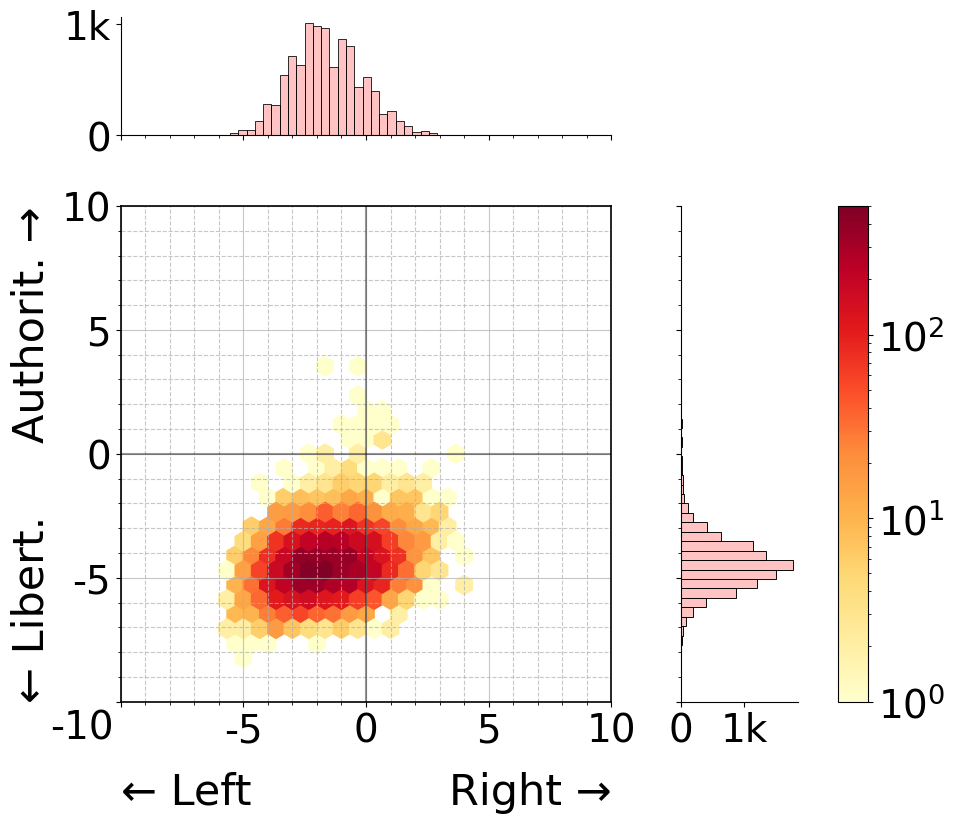

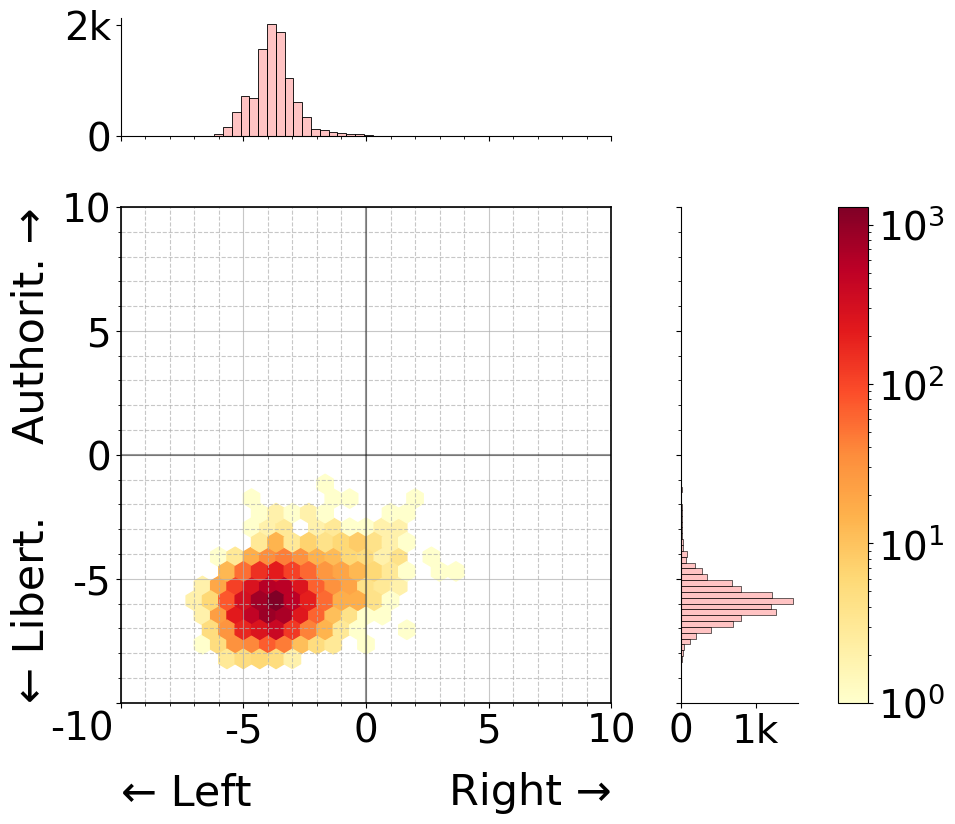

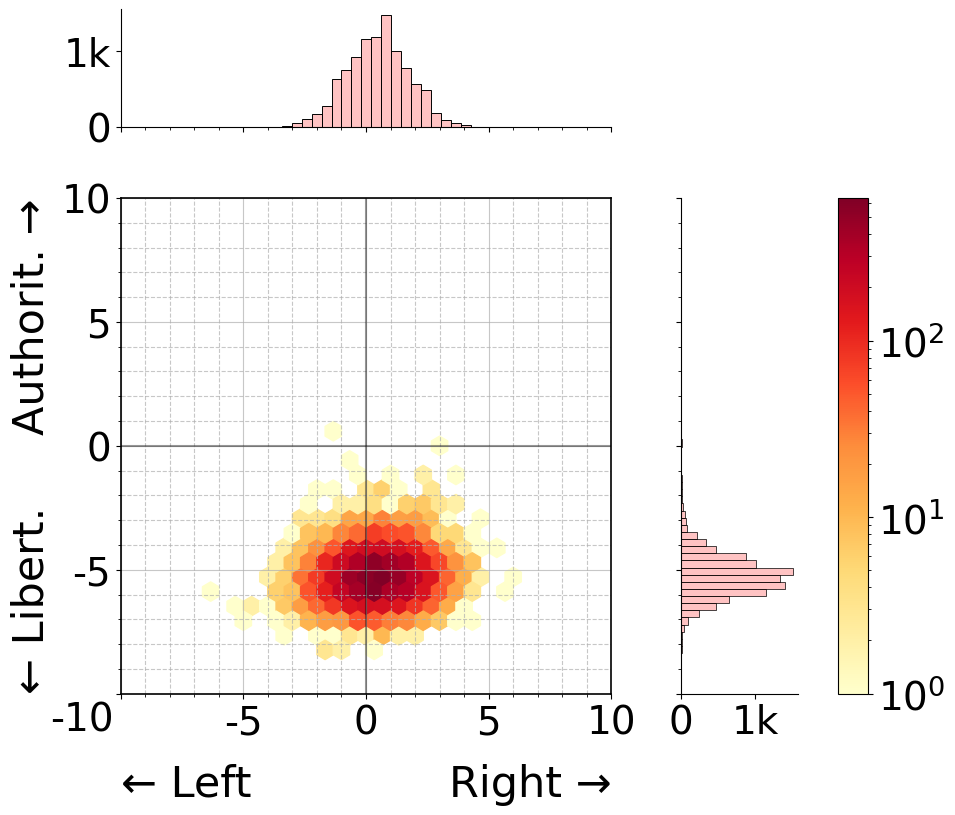

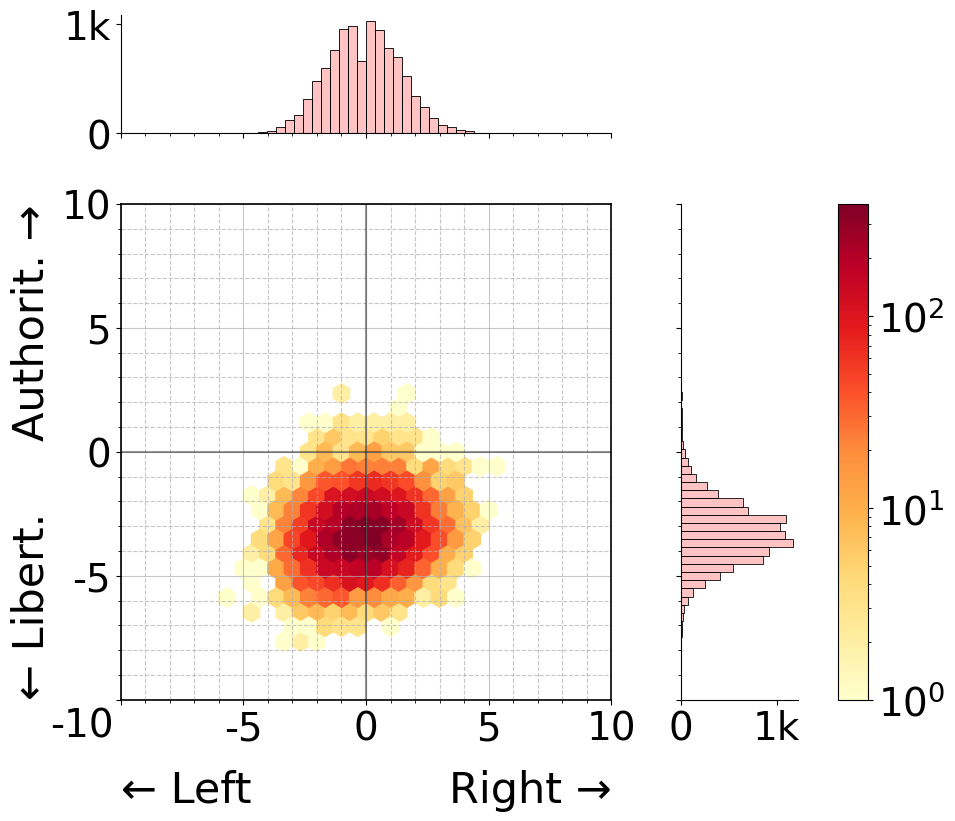

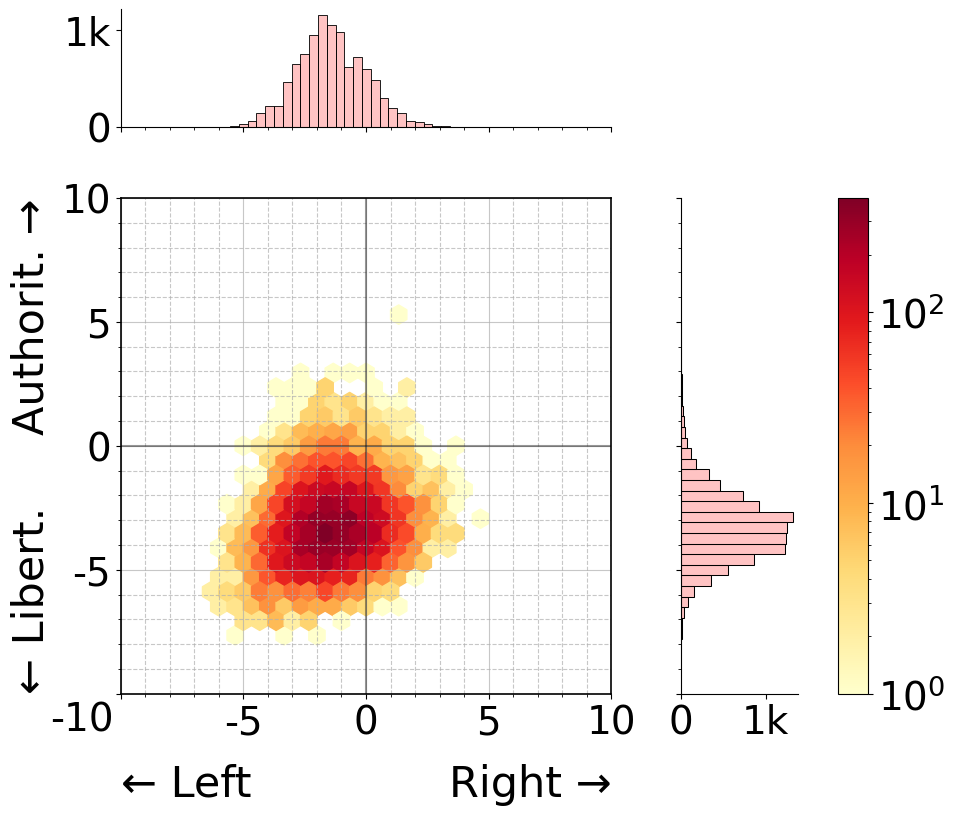

In [18]:
l = plot_compass_density(df_base, bins='log', gridsize=30, label_gap=2.8, 
                             label_margin=0.6, marginal_ratio=3, tick_interval=5, 
                             label_size=31, tick_size=28, colorbar_size=28, marginal_alpha=0.4, origin_lines_alpha=0.4)
    # l.savefig(f'/Users/uqpberna/Documents/Code/ASPD_Generator/images/{model}/libertarian_left_personas/compass_density_log_{model}_lib.png')
plt.show()

l = plot_compass_density(df_l, bins='log', gridsize=30, label_gap=2.8, 
                             label_margin=0.6, marginal_ratio=3, tick_interval=5, 
                             label_size=31, tick_size=28, colorbar_size=28, marginal_alpha=0.4, origin_lines_alpha=0.4)
    # l.savefig(f'/Users/uqpberna/Documents/Code/ASPD_Generator/images/{model}/libertarian_left_personas/compass_density_log_{model}_lib.png')
plt.show()

l = plot_compass_density(df_lib, bins='log', gridsize=30, label_gap=2.8, 
                             label_margin=0.6, marginal_ratio=3, tick_interval=5, 
                             label_size=31, tick_size=28, colorbar_size=28, marginal_alpha=0.4, origin_lines_alpha=0.4)
    # l.savefig(f'/Users/uqpberna/Documents/Code/ASPD_Generator/images/{model}/libertarian_left_personas/compass_density_log_{model}_lib.png')
plt.show()

l = plot_compass_density(df_r, bins='log', gridsize=30, label_gap=2.8, 
                             label_margin=0.6, marginal_ratio=3, tick_interval=5, 
                             label_size=31, tick_size=28, colorbar_size=28, marginal_alpha=0.4, origin_lines_alpha=0.4)
    # l.savefig(f'/Users/uqpberna/Documents/Code/ASPD_Generator/images/{model}/libertarian_left_personas/compass_density_log_{model}_lib.png')
plt.show()

l = plot_compass_density(df_aut, bins='log', gridsize=30, label_gap=2.8, 
                             label_margin=0.6, marginal_ratio=3, tick_interval=5, 
                             label_size=31, tick_size=28, colorbar_size=28, marginal_alpha=0.4, origin_lines_alpha=0.4)
    # l.savefig(f'/Users/uqpberna/Documents/Code/ASPD_Generator/images/{model}/libertarian_left_personas/compass_density_log_{model}_lib.png')
plt.show()

# Significance testing
---

In [2]:
models = ['Mistral-7B-Instruct-v0.3', 'Llama-3.1-8B-Instruct', 'Qwen2.5-7B-Instruct', 'zephyr-7b-beta']

### X and Y axis paired t test
---

In [4]:
def sig_test(df_base, df_aut):
    # First ensure the dataframes are aligned by persona_id
    df_merged = df_base.merge(df_aut, on='persona_id', suffixes=('_base', '_aut'))

    # Extract x and y coordinates
    x_base = np.array([pos[0] for pos in df_merged['compass_position_base']])
    x_aut = np.array([pos[0] for pos in df_merged['compass_position_aut']])
    y_base = np.array([pos[1] for pos in df_merged['compass_position_base']])
    y_aut = np.array([pos[1] for pos in df_merged['compass_position_aut']])

    # Calculate differences
    x_diff = x_aut - x_base
    y_diff = y_aut - y_base
    n = len(x_diff)  # sample size

    # Basic statistics
    print(f"X-axis mean difference: {np.mean(x_diff):.3f}")
    print(f"Y-axis mean difference: {np.mean(y_diff):.3f}")
    print(f"X-axis std difference: {np.std(x_diff):.3f}")
    print(f"Y-axis std difference: {np.std(y_diff):.3f}")

    # 1. Check normality of differences
    _, p_norm_x = stats.normaltest(x_diff)
    _, p_norm_y = stats.normaltest(y_diff)

    print("\nNormality test p-values (D'Agostino-Pearson test):")
    print(f"X-axis differences: p = {p_norm_x:.6f}")
    print(f"Y-axis differences: p = {p_norm_y:.6f}")

    # Wilcoxon signed-rank test with z-score calculation
    w_stat_x, w_p_val_x = stats.wilcoxon(x_base, x_aut)
    w_stat_y, w_p_val_y = stats.wilcoxon(y_base, y_aut)

    # Calculate z-scores for Wilcoxon test
    # z = (W - n(n+1)/4) / sqrt(n(n+1)(2n+1)/24)
    def wilcoxon_z(w_stat, n):
        expected_w = n * (n + 1) / 4
        std_w = np.sqrt(n * (n + 1) * (2 * n + 1) / 24)
        return (w_stat - expected_w) / std_w

    z_score_x = wilcoxon_z(w_stat_x, n)
    z_score_y = wilcoxon_z(w_stat_y, n)

    print("\nWilcoxon signed-rank test results:")
    print(f"X-axis: statistic = {w_stat_x:.3f}, z-score = {z_score_x:.3f}, p-value = {w_p_val_x:.6f}")
    print(f"Y-axis: statistic = {w_stat_y:.3f}, z-score = {z_score_y:.3f}, p-value = {w_p_val_y:.6f}")

    # Effect sizes (Cohen's d) with confidence intervals and p-values
    def cohens_d_with_stats(x1, x2):
        n = len(x1)
        d = (np.mean(x1) - np.mean(x2)) / np.sqrt(
            ((n - 1) * np.var(x1, ddof=1) + (n - 1) * np.var(x2, ddof=1)) / (2 * n - 2)
        )
        
        # Standard error of d
        se = np.sqrt((4/n) + (d*d)/(2*n))  # approximation for paired samples
        
        # Calculate 95% confidence interval
        ci_lower = d - 1.96 * se
        ci_upper = d + 1.96 * se
        
        # Calculate z-score and p-value for Cohen's d
        z_score = d / se
        p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # two-tailed test
        
        return d, ci_lower, ci_upper, z_score, p_value

    d_x, ci_lower_x, ci_upper_x, z_d_x, p_d_x = cohens_d_with_stats(x_aut, x_base)
    d_y, ci_lower_y, ci_upper_y, z_d_y, p_d_y = cohens_d_with_stats(y_aut, y_base)

    print("\nEffect sizes (Cohen's d):")
    print(f"X-axis: d = {d_x:.3f}, 95% CI [{ci_lower_x:.3f}, {ci_upper_x:.3f}], z = {z_d_x:.3f}, p = {p_d_x:.6f}")
    print(f"Y-axis: d = {d_y:.3f}, 95% CI [{ci_lower_y:.3f}, {ci_upper_y:.3f}], z = {z_d_y:.3f}, p = {p_d_y:.6f}")

    return {
        'wilcoxon_x': {'stat': w_stat_x, 'z': z_score_x, 'p': w_p_val_x},
        'wilcoxon_y': {'stat': w_stat_y, 'z': z_score_y, 'p': w_p_val_y},
        'cohens_d_x': {'d': d_x, 'ci': (ci_lower_x, ci_upper_x), 'z': z_d_x, 'p': p_d_x},
        'cohens_d_y': {'d': d_y, 'ci': (ci_lower_y, ci_upper_y), 'z': z_d_y, 'p': p_d_y}
    }

#### Authoritarian right personas
---

In [6]:
model = models[3]

df_aut = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{model}/right_authoritarian_personas/persona_compass.pqt')
df_base = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{model}/base/persona_compass.pqt')


df_aut['compass_position'] = df_aut['compass_position'].apply(lambda x: (x[0], x[1]))
df_base['compass_position'] = df_base['compass_position'].apply(lambda x: (x[0], x[1]))

df_aut = df_aut[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)
df_base = df_base[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

print(f"Using model: {model}")
print("----------------------\n")
sig_test(df_base, df_aut)

Using model: zephyr-7b-beta
----------------------

X-axis mean difference: 1.600
Y-axis mean difference: 1.127
X-axis std difference: 1.550
Y-axis std difference: 0.880

Normality test p-values (D'Agostino-Pearson test):
X-axis differences: p = 0.000000
Y-axis differences: p = 0.000000

Wilcoxon signed-rank test results:
X-axis: statistic = 1282587374.000, z-score = -337.625, p-value = 0.000000
Y-axis: statistic = 406140063.000, z-score = -371.569, p-value = 0.000000

Effect sizes (Cohen's d):
X-axis: d = 1.358, 95% CI [1.348, 1.368], z = 273.774, p = 0.000000
Y-axis: d = 1.653, 95% CI [1.642, 1.663], z = 319.057, p = 0.000000


{'wilcoxon_x': {'stat': 1282587374.0, 'z': -337.62460962481344, 'p': 0.0},
 'wilcoxon_y': {'stat': 406140063.0, 'z': -371.56914072616104, 'p': 0.0},
 'cohens_d_x': {'d': 1.358199040116107,
  'ci': (1.3484754325915704, 1.3679226476406436),
  'z': 273.7739169243609,
  'p': 0.0},
 'cohens_d_y': {'d': 1.6525605807147672,
  'ci': (1.6424087283731479, 1.6627124330563865),
  'z': 319.056919782216,
  'p': 0.0}}

Mistral

In [ ]:
df_aut = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[0]}/authoritarian_right_personas/persona_compass.pqt')
df_base = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[0]}/base/persona_compass.pqt')

df_aut['compass_position'] = df_aut['compass_position'].apply(lambda x: (x[0], x[1]))
df_base['compass_position'] = df_base['compass_position'].apply(lambda x: (x[0], x[1]))

df_aut = df_aut[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)
df_base = df_base[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

In [33]:
print(f"Using model: {models[0]}")
print("----------------------\n")
sig_test(df_base, df_aut)

Using model: Mistral-7B-Instruct-v0.3
----------------------

X-axis mean difference: 0.974
Y-axis mean difference: 1.871
X-axis std difference: 1.705
Y-axis std difference: 1.449

Normality test p-values (D'Agostino-Pearson test):
X-axis differences: p = 0.000000
Y-axis differences: p = 0.000000

Wilcoxon signed-rank test results:
X-axis: statistic = 3905085191.500, z-score = -236.056, p-value = 0.000000
Y-axis: statistic = 403838823.500, z-score = -371.658, p-value = 0.000000

Effect sizes (Cohen's d):
X-axis: d = 0.695, 95% CI [0.686, 0.704], z = 150.902, p = 0.000000
Y-axis: d = 1.445, 95% CI [1.435, 1.455], z = 287.686, p = 0.000000


{'wilcoxon_x': {'stat': 3905085191.5, 'z': -236.05608678026675, 'p': 0.0},
 'wilcoxon_y': {'stat': 403838823.5, 'z': -371.65826701452886, 'p': 0.0},
 'cohens_d_x': {'d': 0.6949261816725621,
  'ci': (0.685900109065379, 0.7039522542797453),
  'z': 150.90232212338566,
  'p': 0.0},
 'cohens_d_y': {'d': 1.4446839816272712,
  'ci': (1.434841389397974, 1.4545265738565685),
  'z': 287.68646897318587,
  'p': 0.0}}

Llama

In [4]:
df_aut = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[1]}/authoritarian_right_personas/persona_compass.pqt')
df_base = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[1]}/base/persona_compass.pqt')

df_aut['compass_position'] = df_aut['compass_position'].apply(lambda x: (x[0], x[1]))
df_base['compass_position'] = df_base['compass_position'].apply(lambda x: (x[0], x[1]))

df_aut = df_aut[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)
df_base = df_base[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

In [5]:
print(f"Using model: {models[1]}")
print("----------------------\n")
sig_test(df_base, df_aut)

Using model: Llama-3.1-8B-Instruct
----------------------

X-axis mean difference: 1.843
Y-axis mean difference: 3.024
X-axis std difference: 2.198
Y-axis std difference: 1.567

Normality test p-values (D'Agostino-Pearson test):
X-axis differences: p = 0.000000
Y-axis differences: p = 0.000000

Wilcoxon signed-rank test results:
X-axis: statistic = 2235592596.500, z-score = -300.715, p-value = 0.000000
Y-axis: statistic = 91759585.000, z-score = -383.745, p-value = 0.000000

Effect sizes (Cohen's d):
X-axis: d = 1.148, 95% CI [1.138, 1.157], z = 237.846, p = 0.000000
Y-axis: d = 2.358, 95% CI [2.347, 2.370], z = 405.020, p = 0.000000


{'wilcoxon_x': {'stat': 2235592596.5, 'z': -300.71501447985446, 'p': 0.0},
 'wilcoxon_y': {'stat': 91759585.0, 'z': -383.7449986233707, 'p': 0.0},
 'cohens_d_x': {'d': 1.147950080653713,
  'ci': (1.1384902683258067, 1.1574098929816194),
  'z': 237.84638427168767,
  'p': 0.0},
 'cohens_d_y': {'d': 2.3583201096175532,
  'ci': (2.3469075588687742, 2.3697326603663322),
  'z': 405.01965919801023,
  'p': 0.0}}

Qwen

In [4]:
df_aut = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[2]}/authoritarian_right_personas/persona_compass.pqt')
df_base = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[2]}/base/persona_compass.pqt')

df_aut['compass_position'] = df_aut['compass_position'].apply(lambda x: (x[0], x[1]))
df_base['compass_position'] = df_base['compass_position'].apply(lambda x: (x[0], x[1]))

df_aut = df_aut[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)
df_base = df_base[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

In [ ]:
print(f"Using model: {models[2]}")
print("----------------------\n")
sig_test(df_base, df_aut)

Zephyr

In [3]:
df_aut = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[3]}/authoritarian_right_personas/persona_compass.pqt')
df_base = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{models[3]}/base/persona_compass.pqt')

df_aut['compass_position'] = df_aut['compass_position'].apply(lambda x: (x[0], x[1]))
df_base['compass_position'] = df_base['compass_position'].apply(lambda x: (x[0], x[1]))

df_aut = df_aut[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)
df_base = df_base[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

In [8]:
print(f"Using model: {models[3]}")
print("----------------------\n")
sig_test(df_base, df_aut)

Using model: zephyr-7b-beta
----------------------

X-axis mean difference: 1.272
Y-axis mean difference: 0.989
X-axis std difference: 1.540
Y-axis std difference: 0.842

Normality test p-values (D'Agostino-Pearson test):
X-axis differences: p = 0.000000
Y-axis differences: p = 0.000000

Wilcoxon signed-rank test results:
X-axis: statistic = 2186116564.000, z-score = -302.631, p-value = 0.000000
Y-axis: statistic = 625460631.500, z-score = -363.075, p-value = 0.000000

Effect sizes (Cohen's d):
X-axis: d = 1.048, 95% CI [1.039, 1.058], z = 219.817, p = 0.000000
Y-axis: d = 1.483, 95% CI [1.473, 1.493], z = 293.746, p = 0.000000


{'wilcoxon_x': {'stat': 2186116564.0, 'z': -302.6312057932277, 'p': 0.0},
 'wilcoxon_y': {'stat': 625460631.5, 'z': -363.07492348665664, 'p': 0.0},
 'cohens_d_x': {'d': 1.0484118687418995,
  'ci': (1.0390636922268583, 1.0577600452569407),
  'z': 219.8169086161155,
  'p': 0.0},
 'cohens_d_y': {'d': 1.4833753972471413,
  'ci': (1.473477687094071, 1.4932731074002117),
  'z': 293.7463043108464,
  'p': 0.0}}

#### Libertarian left personas
---

In [4]:
model = models[3]

In [5]:
df_leftl = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{model}/left_libertarian_personas/persona_compass.pqt')
df_base = pd.read_parquet(f'/Users/uqpberna/Documents/Code/ASPD_Generator/data/processed/{model}/base/persona_compass.pqt')


df_leftl['compass_position'] = df_leftl['compass_position'].apply(lambda x: (x[0], x[1]))
df_base['compass_position'] = df_base['compass_position'].apply(lambda x: (x[0], x[1]))

df_leftl = df_leftl[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)
df_base = df_base[['persona_id', 'compass_position']].drop_duplicates().reset_index(drop=True)

In [6]:
print(f"Using model: {model}")
print("----------------------\n")
sig_test(df_base, df_leftl)

Using model: zephyr-7b-beta
----------------------

X-axis mean difference: -1.990
Y-axis mean difference: -1.272
X-axis std difference: 1.442
Y-axis std difference: 0.658

Normality test p-values (D'Agostino-Pearson test):
X-axis differences: p = 0.000000
Y-axis differences: p = 0.000000

Wilcoxon signed-rank test results:
X-axis: statistic = 479133727.000, z-score = -368.742, p-value = 0.000000
Y-axis: statistic = 49201284.000, z-score = -385.393, p-value = 0.000000

Effect sizes (Cohen's d):
X-axis: d = -1.615, 95% CI [-1.625, -1.605], z = -313.568, p = 0.000000
Y-axis: d = -2.101, 95% CI [-2.112, -2.090], z = -377.115, p = 0.000000


{'wilcoxon_x': {'stat': 479133727.0, 'z': -368.74211887698414, 'p': 0.0},
 'wilcoxon_y': {'stat': 49201284.0, 'z': -385.3932683525193, 'p': 0.0},
 'cohens_d_x': {'d': -1.6147562208375146,
  'ci': (-1.6248494775575655, -1.6046629641174637),
  'z': -313.56798708529993,
  'p': 0.0},
 'cohens_d_y': {'d': -2.1008247872973813,
  'ci': (-2.1117435287914184, -2.0899060458033443),
  'z': -377.1145772936865,
  'p': 0.0}}

### Distance significance testing
---

# Arrow plot
---